# Silhouette extraction methods without Neural Network

## Importing libraries

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Loading test image

In [2]:
image_path = "../data/image_and_masks/train_imgs/train/IMG_20220226_152325568.png"

In [5]:
img = cv2.imread(image_path)

(-0.5, 3263.5, 1835.5, -0.5)

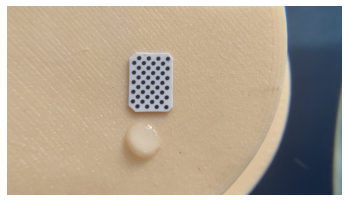

In [6]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

### Smoothing image

In [12]:
imgx = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [13]:
imgx = cv2.GaussianBlur(imgx, (5, 5), 0)

(-0.5, 3263.5, 1835.5, -0.5)

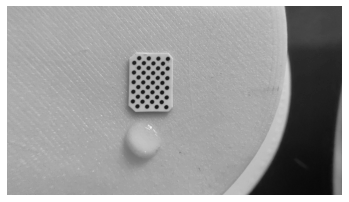

In [14]:
plt.imshow(imgx, cmap = 'gray')
plt.axis('off')

## Using K-Means

### Preprocessing

In [49]:
twoDimg = imgx.reshape((-1, 3))
twoDimg = np.float32(twoDimg)

### Params definition

In [50]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 2
attempts = 10

### Apply K-Means

In [51]:
ret,label,center = cv2.kmeans(twoDimg, K, None, criteria, attempts, cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((imgx.shape))

(-0.5, 3263.5, 1835.5, -0.5)

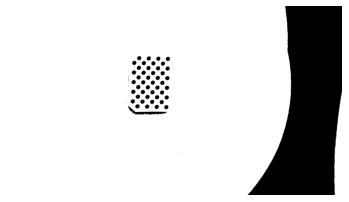

In [52]:
plt.imshow(result_image, cmap = 'gray')
plt.axis('off')

## Using contour detection

### Preprocessing

In [27]:
_, thresh = cv2.threshold(imgx, np.mean(imgx), 255, cv2.THRESH_BINARY_INV)
edges = cv2.dilate(cv2.Canny(thresh, 0, 255), None)

(-0.5, 3263.5, 1835.5, -0.5)

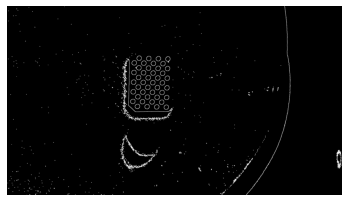

In [28]:
plt.imshow(edges, cmap = 'gray')
plt.axis('off')

### Detect and draw contour

In [29]:
cnt = sorted(cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2], key = cv2.contourArea)[-1]
mask = np.zeros(edges.shape, np.uint8)
masked = cv2.drawContours(mask, [cnt],-1, 255, -1)

(-0.5, 3263.5, 1835.5, -0.5)

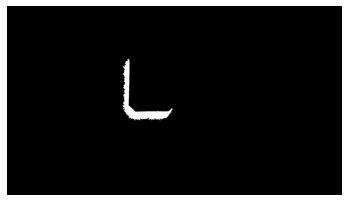

In [30]:
plt.imshow(masked, cmap = 'gray')
plt.axis('off')

## Using thresholding

In [31]:
from skimage.filters import threshold_otsu

### Segmentation process

In [37]:
def filter_image(image, mask):
    r = image[:,:] * mask
    return r

thresh = threshold_otsu(imgx)
img_otsu  = imgx < thresh
filtered = filter_image(imgx, img_otsu)

(-0.5, 3263.5, 1835.5, -0.5)

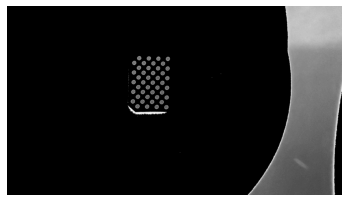

In [39]:
plt.imshow(filtered, cmap = 'gray')
plt.axis('off')

## Using watershed algorithm

### Preprocessing

In [40]:
ret, thresh = cv2.threshold(imgx, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

### Noise removal by morphological opening

In [41]:
# noise removal
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations = 2)

# sure background area
sure_bg = cv2.dilate(opening, kernel, iterations = 3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

(-0.5, 3263.5, 1835.5, -0.5)

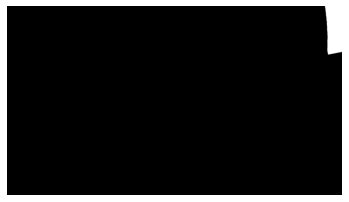

In [42]:
plt.imshow(sure_fg, cmap = 'gray')
plt.axis('off')

(-0.5, 3263.5, 1835.5, -0.5)

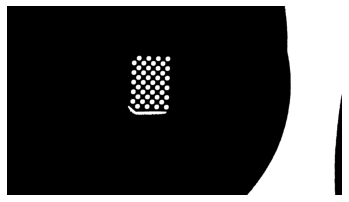

In [43]:
plt.imshow(sure_bg, cmap = 'gray')
plt.axis('off')

(-0.5, 3263.5, 1835.5, -0.5)

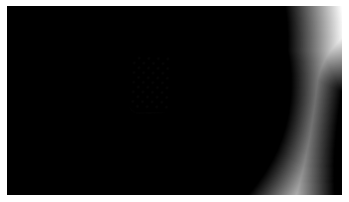

In [44]:
plt.imshow(dist_transform, cmap = 'gray')
plt.axis('off')

(-0.5, 3263.5, 1835.5, -0.5)

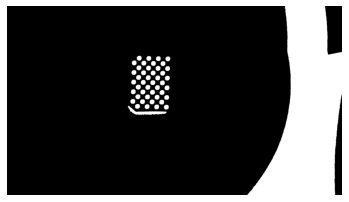

In [45]:
plt.imshow(unknown, cmap = 'gray')
plt.axis('off')

### Get markers

In [46]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers + 1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0

(-0.5, 3263.5, 1835.5, -0.5)

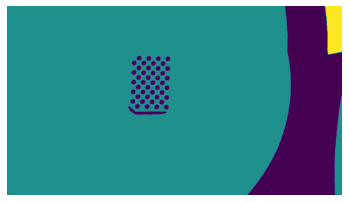

In [47]:
plt.imshow(markers)
plt.axis('off')

### Apply watershed

In [48]:
imgw = imgx.copy()
markers = cv2.watershed(imgw, markers)
imgw[markers == -1] = 255

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\segmentation.cpp:161: error: (-215:Assertion failed) src.type() == CV_8UC3 && dst.type() == CV_32SC1 in function 'cv::watershed'


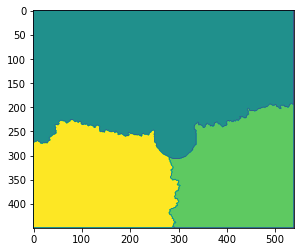

In [38]:
plt.imshow(markers)

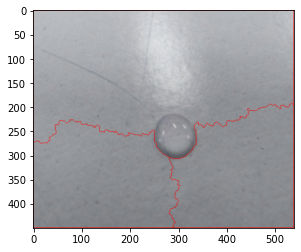

In [39]:
plt.imshow(imgw)